#Persiapan

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
from collections import Counter
import scipy.spatial
import matplotlib.pyplot as plt
from pprint import pprint

In [ ]:
# Import data csv
df = pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check apakah ada nilai null atau tidak
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Figure size 432x288 with 0 Axes>

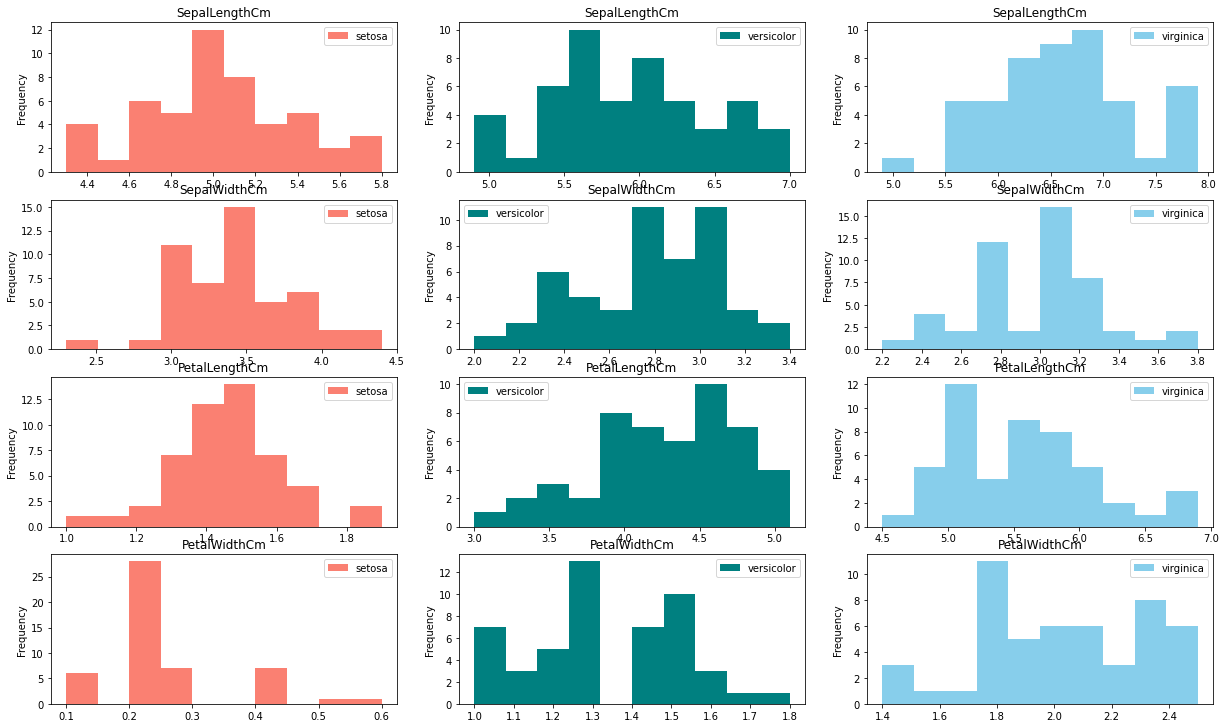

In [ ]:
# Membuat dataframe untuk plot data
setosa = df[df['Species']=='Iris-setosa']
versicolor = df[df['Species']=='Iris-versicolor']
virginica = df[df['Species']=='Iris-virginica']

# Plot data secara histogram sebaran data
plt.figure()
fig,ax=plt.subplots(4,3,figsize=(17, 10))
setosa["SepalLengthCm"].plot(kind="hist", ax=ax[0][0],label="setosa",color ='salmon',fontsize=10)
versicolor["SepalLengthCm"].plot(kind="hist",ax=ax[0][1],label="versicolor",color='teal',fontsize=10)
virginica["SepalLengthCm"].plot(kind="hist",ax=ax[0][2],label="virginica",color='skyblue',fontsize=10)

setosa["SepalWidthCm"].plot(kind="hist", ax=ax[1][0],label="setosa",color ='salmon',fontsize=10)
versicolor["SepalWidthCm"].plot(kind="hist",ax=ax[1][1],label="versicolor",color='teal',fontsize=10)
virginica["SepalWidthCm"].plot(kind="hist",ax=ax[1][2],label="virginica",color='skyblue',fontsize=10)

setosa["PetalLengthCm"].plot(kind="hist", ax=ax[2][0],label="setosa",color ='salmon',fontsize=10)
versicolor["PetalLengthCm"].plot(kind="hist",ax=ax[2][1],label="versicolor",color='teal',fontsize=10)
virginica["PetalLengthCm"].plot(kind="hist",ax=ax[2][2],label="virginica",color='skyblue',fontsize=10)

setosa["PetalWidthCm"].plot(kind="hist", ax=ax[3][0],label="setosa",color ='salmon',fontsize=10)
versicolor["PetalWidthCm"].plot(kind="hist",ax=ax[3][1],label="versicolor",color='teal',fontsize=10)
virginica["PetalWidthCm"].plot(kind="hist",ax=ax[3][2],label="virginica",color='skyblue',fontsize=10)

plt.rcParams.update({'font.size': 10})
plt.tight_layout()

for i in range(4):
  for j in range(3):
    if i == 0:
      ax[i][j].set(title='SepalLengthCm')
    elif i == 1:
      ax[i][j].set(title='SepalWidthCm')
    elif i == 2:
      ax[i][j].set(title='PetalLengthCm')
    else:
      ax[i][j].set(title='PetalWidthCm')

for i in range(4):
  for j in range(3):
    ax[i][j].legend()

plt.show()

In [ ]:
# Mengganti spesies ke dalam bentuk angka
species = {'Iris-versicolor': 0,'Iris-virginica': 1, 'Iris-setosa': 2}
df.Species = [species[item] for item in df.Species]
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Membagi dataset menjadi training set dan test set. Digunakan training set 80% data
shuffle_df = df.sample(frac=1)
train_size = len(df)*0.8
train_df = shuffle_df[:int(train_size)]
test_df = shuffle_df[int(train_size):]

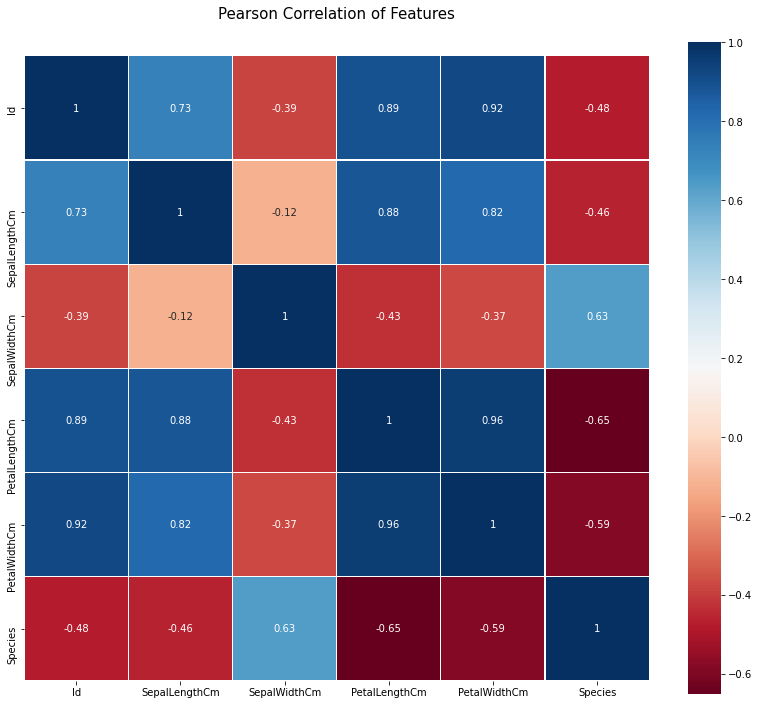

In [ ]:
# Membuat grafik heatmap untuk melihat korelasi dari tiap features
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

#Fungsi KNN

In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.x_train = X
        self.y_train = y
        
    def euclidean_distance(self, X1, X2):
        distance = 0.0
        for i in range(len(X1)-1):
            distance += (X1[i] - X2[i])**2
        return sqrt(distance)
    
    def predict(self, x_test):
        predictions = []
        for i in range(len(x_test)):
            d = []
            votes = []
            for j in range(len(self.x_train)):
                dist = self.euclidean_distance(self.x_train[j] , x_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for d, j in d:
                votes.append(self.y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            predictions.append(ans)
            
        return predictions
    
    def score(self, x_test, y_test):
        predictions = self.predict(x_test)
        total = 0
        for i in range(len(y_test)):
          if predictions[i] == y_test[i]:
            total+=1
        return total / len(y_test)


#Implementasi KNN

In [ ]:
# Melakukan reset index
train_df.reset_index().drop(["index"],axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,116,6.4,3.2,5.3,2.3,1
1,27,5.0,3.4,1.6,0.4,2
2,78,6.7,3.0,5.0,1.7,0
3,123,7.7,2.8,6.7,2.0,1
4,33,5.2,4.1,1.5,0.1,2
...,...,...,...,...,...,...
115,31,4.8,3.1,1.6,0.2,2
116,140,6.9,3.1,5.4,2.1,1
117,139,6.0,3.0,4.8,1.8,1
118,43,4.4,3.2,1.3,0.2,2


In [ ]:
# Melakukan reset index
test_df.reset_index().drop(["index"],axis=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,101,6.3,3.3,6.0,2.5,1
1,107,4.9,2.5,4.5,1.7,1
2,91,5.5,2.6,4.4,1.2,0
3,83,5.8,2.7,3.9,1.2,0
4,49,5.3,3.7,1.5,0.2,2
5,104,6.3,2.9,5.6,1.8,1
6,57,6.3,3.3,4.7,1.6,0
7,56,5.7,2.8,4.5,1.3,0
8,89,5.6,3.0,4.1,1.3,0
9,53,6.9,3.1,4.9,1.5,0


In [ ]:
# Menyiapkan x_train, y_train, x_test, dan y_test
x_train = train_df.drop(["Id","Species"], axis=1)
y_train = train_df["Species"]
x_test = test_df.drop(["Id","Species"], axis=1).copy()
y_test = test_df["Species"]
x_train.shape, y_train.shape, x_test.shape

((120, 4), (120,), (30, 4))

In [ ]:
# Mengubah dataframe menjadi bentuk array
x_train =  np.array(x_train)
y_train =  np.array(y_train)
x_test =  np.array(x_test)
y_test = np.array(y_test)

In [ ]:
# Pemanggilan instance dari class KNN
model = KNN(8)
# Memanggil fungsi fit untuk menginisialisasi data yang akan di-train
model.fit(x_train, y_train)
# Memanggil fungsi predict untuk memprediksi nilai
prediction = model.predict(x_test)
prediction

[1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0]

In [ ]:
# Memanggil fungsi score untuk mendapatkan akurasi dari machine learning yang dibuat
model.score(x_test,y_test)

0.9666666666666667

In [ ]:
# Melihat kolom apa saja yang ada pada dataframe df
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Membuat dataframe result yang berisi features
result = pd.DataFrame(x_test,columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
# Membuat dataframe species yang berisi hasil prediksi
species = pd.DataFrame(prediction, columns=["Species"])
# Melihat bentuk dari dataframe
result.shape, species.shape

((30, 4), (30, 1))

In [ ]:
# Menambah kolom Species dengan data pada dataframe species
result["Species"] = species

In [ ]:
# Melihat 5 data teratas pada dataframe result
result.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.3,3.3,6.0,2.5,1
1,4.9,2.5,4.5,1.7,0
2,5.5,2.6,4.4,1.2,0
3,5.8,2.7,3.9,1.2,0
4,5.3,3.7,1.5,0.2,2


In [ ]:
# Melakukan mapping value dari kolom spesies dari angka menjadi dalam bentuk kata jenis spesies
species_mapping = {0 : 'Iris-versicolor', 1 :'Iris-virginica', 2: 'Iris-setosa'}
result["Species"] = result["Species"].map(species_mapping).astype(str)
result.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,6.3,3.3,6.0,2.5,Iris-virginica
1,4.9,2.5,4.5,1.7,Iris-versicolor
2,5.5,2.6,4.4,1.2,Iris-versicolor
3,5.8,2.7,3.9,1.2,Iris-versicolor
4,5.3,3.7,1.5,0.2,Iris-setosa


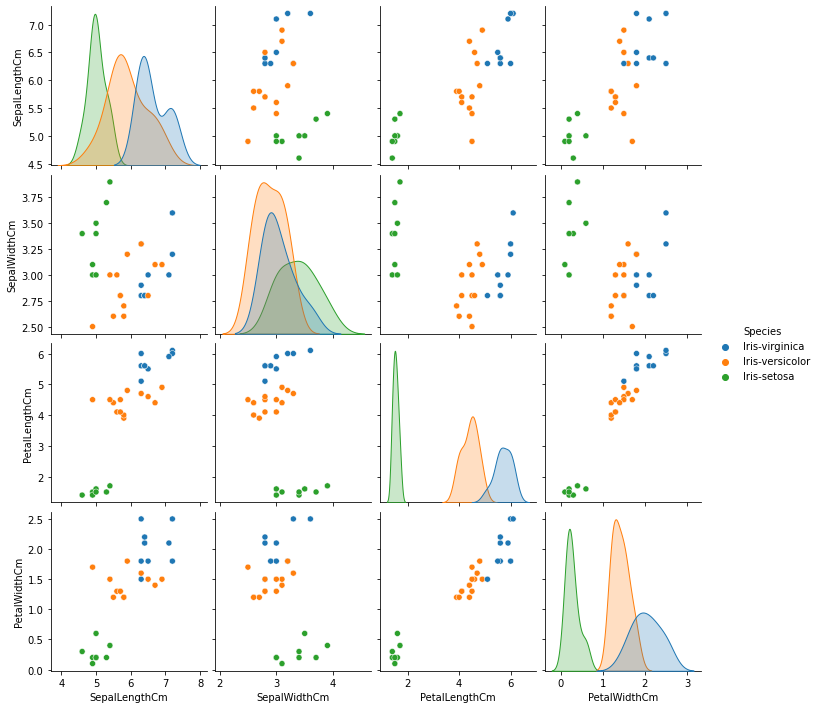

In [ ]:
# Plot untuk melihat gambaran sebaran tiap spesies
sns.pairplot(data=result, hue="Species")

#Cross Validation

In [ ]:
fold = [shuffle_df[0:29],shuffle_df[30:59],shuffle_df[60:89],shuffle_df[90:119],shuffle_df[120:149]]
train = []
test = []
cross_val={'train': train, 'test': test}
for i, j in enumerate(fold):
    train.append(fold[:i] + fold[i+1:])
    test.append(j)
pprint(cross_val)

{'test': [      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
115  116            6.4           3.2            5.3           2.3        1
26    27            5.0           3.4            1.6           0.4        2
77    78            6.7           3.0            5.0           1.7        0
122  123            7.7           2.8            6.7           2.0        1
32    33            5.2           4.1            1.5           0.1        2
12    13            4.8           3.0            1.4           0.1        2
60    61            5.0           2.0            3.5           1.0        0
145  146            6.7           3.0            5.2           2.3        1
87    88            6.3           2.3            4.4           1.3        0
41    42            4.5           2.3            1.3           0.3        2
97    98            6.2           2.9            4.3           1.3        0
13    14            4.3           3.0            1.1           0.1        2
23

In [ ]:
train_list = cross_val["train"]
train_list

[[      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
  16    17            5.4           3.9            1.3           0.4        2
  49    50            5.0           3.3            1.4           0.2        2
  44    45            5.1           3.8            1.9           0.4        2
  81    82            5.5           2.4            3.7           1.0        0
  45    46            4.8           3.0            1.4           0.3        2
  68    69            6.2           2.2            4.5           1.5        0
  85    86            6.0           3.4            4.5           1.6        0
  72    73            6.3           2.5            4.9           1.5        0
  135  136            7.7           3.0            6.1           2.3        1
  91    92            6.1           3.0            4.6           1.4        0
  19    20            5.1           3.8            1.5           0.3        2
  107  108            7.3           2.9            6.3          

In [ ]:
test_list = cross_val["test"]
test_list

[      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
 115  116            6.4           3.2            5.3           2.3        1
 26    27            5.0           3.4            1.6           0.4        2
 77    78            6.7           3.0            5.0           1.7        0
 122  123            7.7           2.8            6.7           2.0        1
 32    33            5.2           4.1            1.5           0.1        2
 12    13            4.8           3.0            1.4           0.1        2
 60    61            5.0           2.0            3.5           1.0        0
 145  146            6.7           3.0            5.2           2.3        1
 87    88            6.3           2.3            4.4           1.3        0
 41    42            4.5           2.3            1.3           0.3        2
 97    98            6.2           2.9            4.3           1.3        0
 13    14            4.3           3.0            1.1           0.1        2

In [ ]:
predictions = []
scores = []
# iterasi untuk me-running 
for i in range(5):
  temp = []
  if i!=0:
    for j in range(i):
      temp = temp + train_list[j]
  for k in range(5-(i+1)):
    temp = temp + train_list[k+i+1]
  train_temp = temp
  test_temp = test_list[i]
  train_temp = pd.concat(train_temp)

  x_train = np.array(train_temp.drop(["Id","Species"], axis=1))
  y_train = np.array(train_temp["Species"])
  x_test = np.array(test_temp.drop(["Id","Species"], axis=1).copy())
  y_test = np.array(test_temp["Species"])
  model = KNN(8)
  model.fit(x_train, y_train)
  prediction = model.predict(x_test)
  score = model.score(x_test,y_test)
  predictions.append(prediction)
  scores.append(score)

In [ ]:
predictions

[[1,
  2,
  0,
  1,
  2,
  2,
  0,
  1,
  0,
  2,
  0,
  2,
  2,
  2,
  0,
  2,
  2,
  1,
  1,
  2,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  2],
 [2,
  2,
  2,
  0,
  2,
  0,
  0,
  0,
  1,
  0,
  2,
  1,
  0,
  0,
  0,
  2,
  1,
  1,
  2,
  1,
  1,
  2,
  1,
  1,
  1,
  0,
  2,
  2,
  1],
 [2,
  0,
  1,
  2,
  2,
  0,
  0,
  1,
  2,
  0,
  1,
  1,
  0,
  1,
  2,
  1,
  0,
  2,
  1,
  0,
  2,
  2,
  1,
  2,
  2,
  1,
  1,
  0,
  0],
 [1,
  0,
  1,
  1,
  2,
  1,
  0,
  2,
  2,
  1,
  0,
  0,
  0,
  1,
  0,
  2,
  0,
  2,
  2,
  2,
  1,
  0,
  1,
  0,
  2,
  2,
  1,
  1,
  2],
 [1,
  1,
  0,
  0,
  2,
  1,
  0,
  0,
  0,
  0,
  2,
  1,
  1,
  2,
  1,
  0,
  1,
  2,
  2,
  2,
  2,
  0,
  2,
  1,
  1,
  0,
  1,
  0,
  0]]

In [ ]:
scores

[1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
# Menghitung akurasi rata-rata
total = 0
for score in scores:
  total+=score

average_accuracy = total/len(scores)
print(str(average_accuracy*100)+'%')

100.0%
